# Fashion MNIST

## 1. 데이터 불러오기 및 확인
## 2. 데이터 전처리

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [2]:
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

x_train=x_train.reshape(-1, 28, 28, 1)
x_test=x_test.reshape(-1, 28, 28, 1)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

# 데이터 전처리 (정규화 만을 수행함)
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

# 정답 원핫 인코딩은 수행하지 않음.
# y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
# y_test = tf.keras.utils.to_categorical(t_test, num_classes=10)

4431872/4422102 [==============================] - 1s 0us/step
(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000,) (10000,)


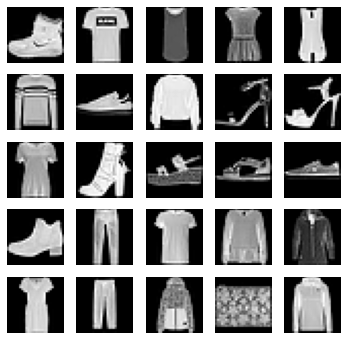

In [8]:
import matplotlib.pyplot as plt

# 25개의 이미지 출력
plt.figure(figsize=(6,6))

for index in range(25):   # 25 개 이미지 출력
    plt.subplot(5,5, index + 1) # 5행 5열
    plt.imshow(x_train[index], cmap='gray')
    plt.axis('off')
    
plt.show()

## 3. 모델 구축 및 컴파일

In [3]:
cnn = Sequential()

cnn.add(Conv2D(input_shape=(28,28,1), kernel_size=(3,3),
               # 28x28 크기 2차원 이미지를 784개의 1차원 벡터로 변환
               filters=32, activation='relu'))
cnn.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

In [4]:
cnn.compile(loss='sparse_categorical_crossentropy',
            # 정답이 원핫 인코딩 방식이 아니기 때문에
            # loss='sparse_categorical_crossentropy'
            optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

## 4. 모델학습

In [5]:
hist = cnn.fit(x_train, y_train, batch_size=128, 
               epochs=30, validation_data=(x_test, y_test))
                # training data로부터 30% 비율로 validation data 생성 후
                # overfitting 확인

Epoch 1/30
469/469 [==============================] - 83s 176ms/step - loss: 0.5234 - accuracy: 0.8147 - val_loss: 0.3482 - val_accuracy: 0.8741
Epoch 2/30
469/469 [==============================] - 83s 178ms/step - loss: 0.3454 - accuracy: 0.8771 - val_loss: 0.2898 - val_accuracy: 0.8933
Epoch 3/30
469/469 [==============================] - 85s 181ms/step - loss: 0.2916 - accuracy: 0.8939 - val_loss: 0.2610 - val_accuracy: 0.9036
Epoch 4/30
469/469 [==============================] - 88s 187ms/step - loss: 0.2599 - accuracy: 0.9065 - val_loss: 0.2457 - val_accuracy: 0.9112
Epoch 5/30
469/469 [==============================] - 89s 190ms/step - loss: 0.2370 - accuracy: 0.9137 - val_loss: 0.2311 - val_accuracy: 0.9161
Epoch 6/30
469/469 [==============================] - 88s 188ms/step - loss: 0.2173 - accuracy: 0.9203 - val_loss: 0.2280 - val_accuracy: 0.9168
Epoch 7/30
469/469 [==============================] - 90s 192ms/step - loss: 0.2015 - accuracy: 0.9252 - val_loss: 0.2208 - val_ac

## 5. 모델 (정확도) 평가

In [9]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.2866 - accuracy: 0.9278


[0.2865920960903168, 0.9277999997138977]

## 6. 손실 및 정확도

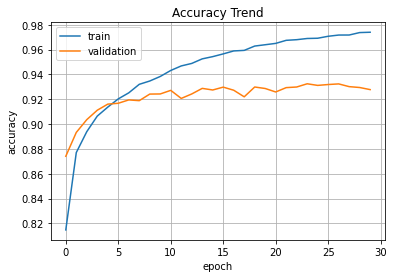

In [10]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()

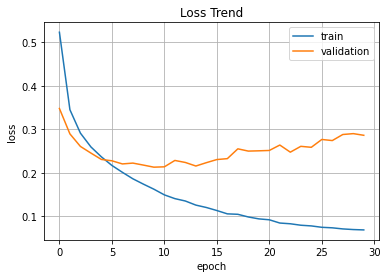

In [11]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()

## 7. 혼동 행렬(confusion matrix)

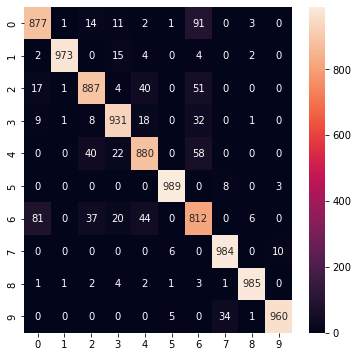

In [14]:
from sklearn. metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6,6))
predicted_value = cnn.predict(x_test)
cm = confusion_matrix(y_test, np.argmax(predicted_value, axis=-1))
    # y_test - 테스트 데이터 정답 (10진수) [원핫 인코딩이 아니기 때문]
    # 예측값(predicted_value) - softmax에 의해 10개의 노드로 출력됨
    # numpy의 argmax를 통해 가장 높은 값의 노드로 출력됨.
    
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

- 6번은 80% 초반의 정확성, 0,2,4번은 90%가 되지 않는 정확성을 보임